[View in Colaboratory](https://colab.research.google.com/github/rimoune/coursera_training_deep_learning/blob/master/Towards_Yolo.ipynb)

In [1]:
!git clone "https://github.com/thtrieu/darkflow.git"

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 37.26 MiB/s, done.
Resolving deltas: 100% (1781/1781), done.


In [74]:
!ls

bin    darkflow		  labels.txt   sample_img  VOCtest_06-Nov-2007.tar
build  darkflow.egg-info  LICENSE      setup.py
cfg    demo.gif		  preview.png  test
ckpt   flow		  README.md    VOCdevkit


In [0]:
!cd ./darkflow/

In [0]:
# This to change directory
import os
os.chdir('darkflow')

In [11]:
!pip install -e .


Obtaining file:///content/darkflow
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/content/darkflow/setup.py", line 3, in <module>
        from Cython.Build import cythonize
    ModuleNotFoundError: No module named 'Cython'
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /content/darkflow/


In [12]:
!pip install Cython

    100% |████████████████████████████████| 3.4MB 5.7MB/s 


In [13]:
!pip install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [14]:
!ls

build  darkflow		  demo.gif  labels.txt	preview.png  sample_img  test
cfg    darkflow.egg-info  flow	    LICENSE	README.md    setup.py


In [15]:
!more labels.txt

aeroplane
bicycle
bird
boat


In [19]:
!flow --h


Example usage: flow --imgdir sample_img/ --model cfg/yolo.cfg --load bin/yolo.weights

Arguments:
  --help, --h, -h  show this super helpful message and exit
  --imgdir         path to testing directory with images
  --binary         path to .weights directory
  --config         path to .cfg directory
  --dataset        path to dataset directory
  --labels         path to labels file
  --backup         path to backup folder
  --summary        path to TensorBoard summaries directory
  --annotation     path to annotation directory
  --threshold      detection threshold
  --model          configuration of choice
  --trainer        training algorithm
  --momentum       applicable for rmsprop and momentum optimizers
  --verbalise      say out loud while building graph
  --train          train the whole net
  --load           how to initialize the net? Either from .weights or a checkpoint, or even from scratch
  --savepb         save net and weight to a .pb file
  --gpu            how much 

In [21]:
!flow --model cfg/tiny-yolo.cfg --load bin/tiny-yolo.weights


Traceback (most recent call last):
  File "/usr/local/bin/flow", line 6, in <module>
    exec(compile(open(__file__).read(), __file__, 'exec'))
  File "/content/darkflow/flow", line 6, in <module>
    cliHandler(sys.argv)
  File "/content/darkflow/darkflow/cli.py", line 26, in cliHandler
    tfnet = TFNet(FLAGS)
  File "/content/darkflow/darkflow/net/build.py", line 58, in __init__
    darknet = Darknet(FLAGS)
  File "/content/darkflow/darkflow/dark/darknet.py", line 13, in __init__
    self.get_weight_src(FLAGS)
  File "/content/darkflow/darkflow/dark/darknet.py", line 47, in get_weight_src
    '{} not found'.format(FLAGS.load)
AssertionError: bin/tiny-yolo.weights not found


In [27]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2018-10-12 15:54:37--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  42.4MB/s    in 6.0s    

2018-10-12 15:54:44 (39.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [28]:
!ls

bin    ckpt		  demo.gif    LICENSE	   sample_img  yolov3.weights
build  darkflow		  flow	      preview.png  setup.py
cfg    darkflow.egg-info  labels.txt  README.md    test


In [0]:
!mv yolov3.weights bin/

In [31]:
!ls bin/

yolov3.weights


In [33]:
# !flow --model cfg/tiny-yolo.cfg --load bin/tiny-yolo.weights
!flow --model cfg/tiny-yolo.cfg --load bin/yolov3.weights


/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov3.cfg not found, use cfg/tiny-yolo.cfg instead
  cfg_path, FLAGS.model))
Parsing cfg/tiny-yolo.cfg
Loading bin/yolov3.weights ...
Traceback (most recent call last):
  File "/usr/local/bin/flow", line 6, in <module>
    exec(compile(open(__file__).read(), __file__, 'exec'))
  File "/content/darkflow/flow", line 6, in <module>
    cliHandler(sys.argv)
  File "/content/darkflow/darkflow/cli.py", line 26, in cliHandler
    tfnet = TFNet(FLAGS)
  File "/content/darkflow/darkflow/net/build.py", line 58, in __init__
    darknet = Darknet(FLAGS)
  File "/content/darkflow/darkflow/dark/darknet.py", line 27, in __init__
    self.load_weights()
  File "/content/darkflow/darkflow/dark/darknet.py", line 82, in load_weights
    wgts_loader = loader.create_loader(*args)
  File "/content/darkflow/darkflow/utils/loader.py", line 105, in create_loader
    return load_type(path, cfg)
  File "/content/darkflow/darkflow/utils/loader.py

In [35]:
!wget https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU

--2018-10-12 16:01:48--  https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU
Resolving drive.google.com (drive.google.com)... 74.125.139.113, 74.125.139.101, 74.125.139.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘0B1tW_VtY7onidEwyQ2FtQVplWEU’

0B1tW_VtY7onidEwyQ2     [  <=>               ] 159.08K  97.7KB/s    in 1.6s    

2018-10-12 16:01:50 (97.7 KB/s) - ‘0B1tW_VtY7onidEwyQ2FtQVplWEU’ saved [162893]



In [38]:
!ls

bin    ckpt		  demo.gif    LICENSE	   sample_img
build  darkflow		  flow	      preview.png  setup.py
cfg    darkflow.egg-info  labels.txt  README.md    test


In [41]:
# !flow --model cfg/yolo-new.cfg non c'e yolo-new.cfg e non ho per ora i pesi di tiny-yolo, quindi lo considero come nuovo
!flow --model cfg/tiny-yolo.cfg


Parsing cfg/tiny-yolo.cfg
Loading None ...
Finished in 9.322166442871094e-05s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  

In [43]:
!ls sample_img/out

sample_computer.jpg  sample_eagle.jpg	 sample_horses.jpg  sample_person.jpg
sample_dog.jpg	     sample_giraffe.jpg  sample_office.jpg  sample_scream.jpg


In [44]:
!ls sample_img

out		     sample_eagle.jpg	 sample_office.jpg
sample_computer.jpg  sample_giraffe.jpg  sample_person.jpg
sample_dog.jpg	     sample_horses.jpg	 sample_scream.jpg


Populating the interactive namespace from numpy and matplotlib


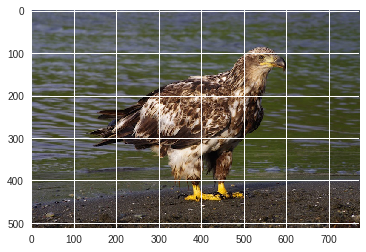

In [56]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./sample_img/out/sample_eagle.jpg')
imgplot = plt.imshow(img)
plt.show()


In [59]:
!flow --imgdir sample_img/ --model cfg/tiny-yolo.cfg --gpu 1.0 --json



Parsing cfg/tiny-yolo.cfg
Loading None ...
Finished in 7.414817810058594e-05s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  

In [61]:
!ls sample_img/out

sample_computer.jpg   sample_giraffe.jpg   sample_person.jpg
sample_computer.json  sample_giraffe.json  sample_person.json
sample_dog.jpg	      sample_horses.jpg    sample_scream.jpg
sample_dog.json       sample_horses.json   sample_scream.json
sample_eagle.jpg      sample_office.jpg
sample_eagle.json     sample_office.json


In [64]:
import json
decod = json.loads("/sample_img/out/sample_computer.json")


JSONDecodeError: ignored

In [68]:
!more sample_img/out/sample_dog.json
with open("sample_img/out/sample_dog.json", "r") as read_file:
    data = json.load(read_file)

[]


In [70]:
!flow --model cfg/tiny-yolo.cfg --train --trainer adam --gpu 1.0 --json --annotation



Parsing cfg/tiny-yolo.cfg
Loading None ...
Finished in 7.2479248046875e-05s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | 

In [71]:
!curl -O https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar
!vim VOCdevkit/VOC2007/Annotations/000001.xml


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430M  100  430M    0     0  38.3M      0  0:00:11  0:00:11 --:--:-- 41.4M
/bin/bash: vim: command not found


In [72]:
!more VOCdevkit/VOC2007/Annotations/000001.xml

<annotation>
	<folder>VOC2007</folder>
	<filename>000001.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>341012865</flickrid>
	</source>
	<owner>
		<flickrid>Fried Camels</flickrid>
		<name>Jinky the Fruit Bat</name>
	</owner>
	<size>
		<width>353</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>dog</name>
		<pose>Left</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>48</xmin>
			<ymin>240</ymin>
			<xmax>195</xmax>
			<ymax>371</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Left</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>8</xmin>
			<ymin>12</ymin>
			<xmax>352</xmax>
			<ymax>498</ymax>
		</bndbox>
	</object>
</annotation>


In [73]:
!flow --model cfg/yolo-new.cfg --train --dataset "~/VOCdevkit/VOC2007/JPEGImages" --annotation "~/VOCdevkit/VOC2007/Annotations"



Parsing cfg/yolo-new.cfg
Traceback (most recent call last):
  File "/usr/local/bin/flow", line 6, in <module>
    exec(compile(open(__file__).read(), __file__, 'exec'))
  File "/content/darkflow/flow", line 6, in <module>
    cliHandler(sys.argv)
  File "/content/darkflow/darkflow/cli.py", line 26, in cliHandler
    tfnet = TFNet(FLAGS)
  File "/content/darkflow/darkflow/net/build.py", line 58, in __init__
    darknet = Darknet(FLAGS)
  File "/content/darkflow/darkflow/dark/darknet.py", line 17, in __init__
    src_parsed = self.parse_cfg(self.src_cfg, FLAGS)
  File "/content/darkflow/darkflow/dark/darknet.py", line 68, in parse_cfg
    for i, info in enumerate(cfg_layers):
  File "/content/darkflow/darkflow/utils/process.py", line 66, in cfg_yielder
    layers, meta = parser(model); yield meta;
  File "/content/darkflow/darkflow/utils/process.py", line 17, in parser
    with open(model, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'cfg/yolo-new.cfg'


In [76]:
# provo a tirar su i pesi piccoli

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving yolov3.cfg to yolov3.cfg
User uploaded file "yolov3.cfg" with length 9131 bytes


In [78]:
!more yolov3.cfg

[net]
# Testing
# batch=1
# subdivisions=1
# Training
batch=64
subdivisions=16
width=608
height=608
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutiona

In [0]:
!mv yolov3.cfg cfg/

In [84]:
!ls bin/

yolov3.weights


In [81]:
!flow --model cfg/yolov3.cfg --load bin/yolov3.weights



Parsing ./cfg/yolov3.cfg
Layer [shortcut] not implemented


In [85]:
!flow --imgdir sample_img/ --model cfg/yolov3.cfg --load bin/yolov3.weights --json 


Parsing ./cfg/yolov3.cfg
Layer [shortcut] not implemented


In [87]:
!ls -r

yolo-tiny.weights	 setup.py     LICENSE	  darkflow.egg-info  build
VOCtest_06-Nov-2007.tar  sample_img   labels.txt  darkflow	     bin
VOCdevkit		 README.md    flow	  ckpt
test			 preview.png  demo.gif	  cfg


In [90]:
!ls -l sample_img/out

total 2384
-rw-r--r-- 1 root root   64585 Oct 12 16:28 sample_computer.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_computer.json
-rw-r--r-- 1 root root  175825 Oct 12 16:28 sample_dog.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_dog.json
-rw-r--r-- 1 root root  150673 Oct 12 16:28 sample_eagle.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_eagle.json
-rw-r--r-- 1 root root  235548 Oct 12 16:28 sample_giraffe.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_giraffe.json
-rw-r--r-- 1 root root  145760 Oct 12 16:28 sample_horses.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_horses.json
-rw-r--r-- 1 root root 1431571 Oct 12 16:28 sample_office.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_office.json
-rw-r--r-- 1 root root  120881 Oct 12 16:28 sample_person.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_person.json
-rw-r--r-- 1 root root   72615 Oct 12 16:28 sample_scream.jpg
-rw-r--r-- 1 root root       2 Oct 12 16:29 sample_scr

In [91]:
!more sample_img/out/sample_computer.json

[]


In [0]:
!cp cfg/yolov3.cfg cfg/yolov3-rima.cfg

In [95]:
!ls cfg

coco.names	     tiny-yolo-4c.cfg	v1	  yolov3.cfg
extraction.cfg	     tiny-yolo.cfg	v1.1	  yolov3-rima.cfg
extraction.conv.cfg  tiny-yolo-voc.cfg	yolo.cfg  yolo-voc.cfg


In [0]:
!apt-get install vim

In [0]:
!vi cfg/yolov3-rima.cfg

In [105]:
!nano cfg/yolov3-rima.cfg

/bin/bash: nano: command not found


In [106]:
!sudo apt-get install nano

/bin/bash: sudo: command not found


In [107]:
!pip install nano

    100% |████████████████████████████████| 61kB 2.2MB/s 


In [0]:
!vi cfg/yolov3-rima.cfg /classes =

In [0]:
from google.colab import files

# with open('cfg/yolov3-rima.cfg', 'w') as f:
#   f.write('some content')

files.download('labels.txt')


In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving labels.txt to labels (1).txt
User uploaded file "labels.txt" with length 4 bytes


In [0]:
!mv yolov3-rima.cfg cfg/

In [0]:
!mkdir old
!mv labels.txt old/
!mv 'labels (1).txt' 'labels.txt'

In [13]:
!more labels.txt

1
0
